https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/

https://medium.com/@luuisotorres/logistic-regression-in-credit-risk-the-role-of-weight-of-evidence-and-information-value-9e26dd690b16

| Variable                  | Descripción                                                                             |
|---------------------------|-----------------------------------------------------------------------------------------|
| `loan_id`                 | Número de identificación único de cada muestra.                                         |
| `no_of_dependents`        | Número de dependientes del solicitante.                                                 |
| `education`               | Nivel educativo del solicitante (Graduado o No Graduado).                               |
| `self_employed`           | Indica si el solicitante es trabajador autónomo o no.                                   |
| `income_annum`            | Ingreso anual del solicitante.                                                          |
| `loan_amount`             | Monto total solicitado para el préstamo.                                                |
| `loan_term`               | Duración, en años, dentro de la cual se debe reembolsar el préstamo.                    |
| `cibil_score`             | Puntaje crediticio del solicitante.                                                     |
| `residential_assets_value`| Valor total de los activos residenciales del solicitante.                               |
| `commercial_assets_value` | Valor total de los activos comerciales del solicitante.                                 |
| `luxury_assets_value`     | Valor total de los activos de lujo del solicitante.                                     |
| `bank_asset_value`        | Valor total de los activos bancarios del solicitante.                                   |
| `loan_status`             | Variable objetivo. Describe si el préstamo fue aprobado o no.                           |

,Description,Value
0,Session id,42
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(4269, 12)"
4,Transformed data shape,"(4999, 12)"
5,Transformed train set shape,"(3718, 12)"
6,Transformed test set shape,"(1281, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8027,0.8860,0.6726,0.7755,0.7204,0.5691,0.5726
1,0.7726,0.8434,0.6814,0.7064,0.6937,0.5129,0.5131
2,0.8261,0.8881,0.7788,0.7652,0.7719,0.6314,0.6315
3,0.7893,0.8980,0.7434,0.7119,0.7273,0.5557,0.5561
4,0.7793,0.8422,0.6637,0.7282,0.6944,0.5222,0.5236
5,0.7592,0.8489,0.6106,0.7113,0.6571,0.4732,0.4765
6,0.8161,0.8981,0.7699,0.7500,0.7598,0.6108,0.6110
7,0.7826,0.8522,0.6018,0.7727,0.6766,0.5167,0.5258
8,0.7550,0.8284,0.6518,0.6822,0.6667,0.4732,0.4735


Transformation Pipeline and Model Successfully Saved


PermutationExplainer explainer: 855it [01:04, 11.23it/s]                         


<Figure size 2000x300 with 0 Axes>

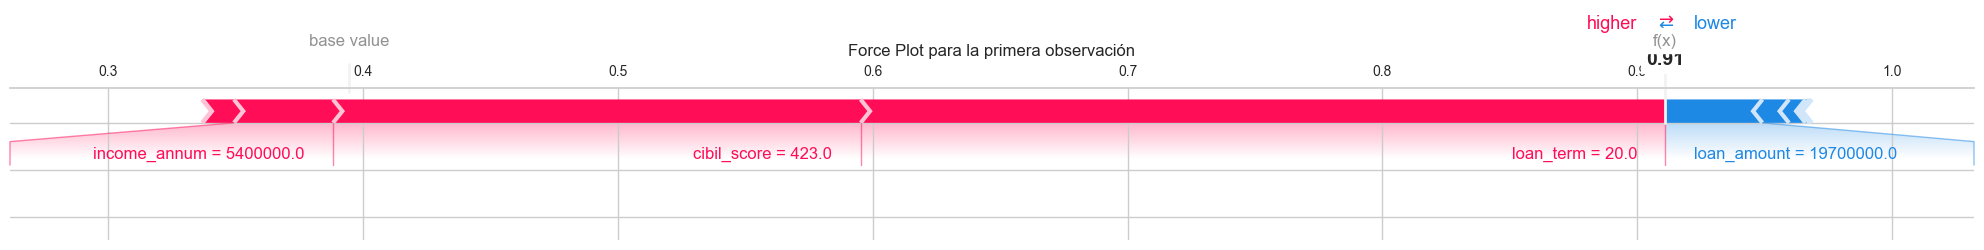

<Figure size 2000x300 with 0 Axes>

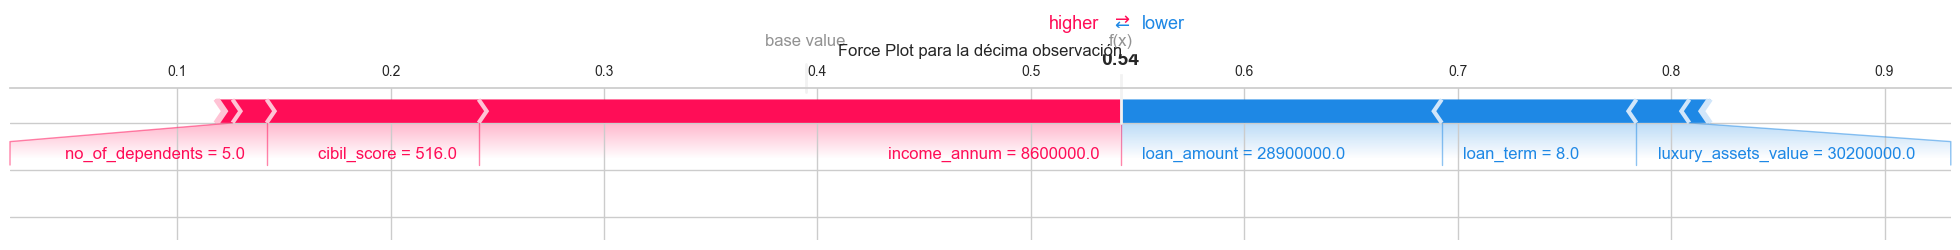

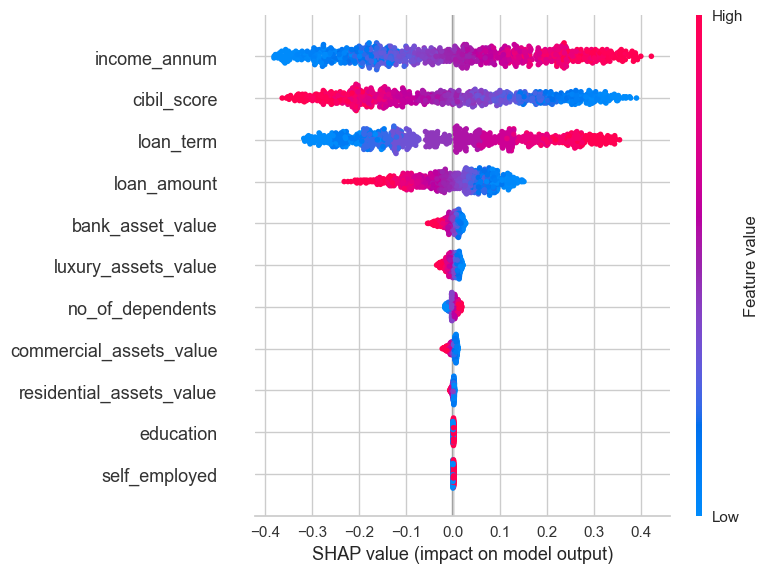

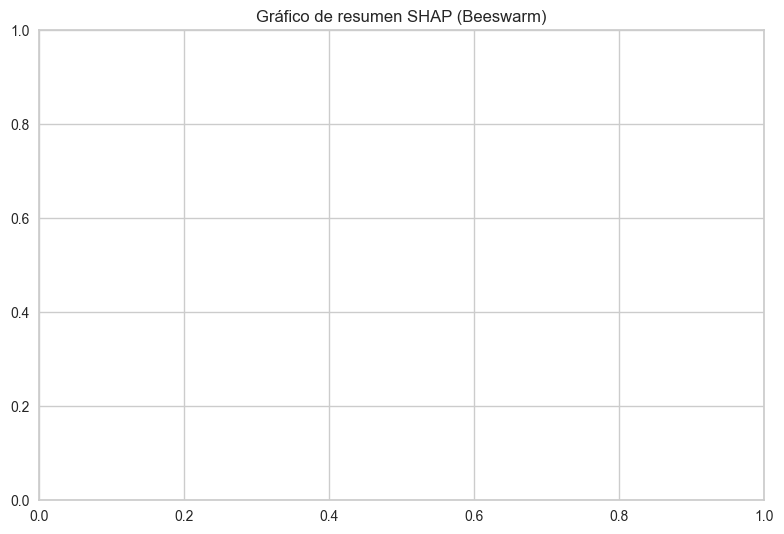

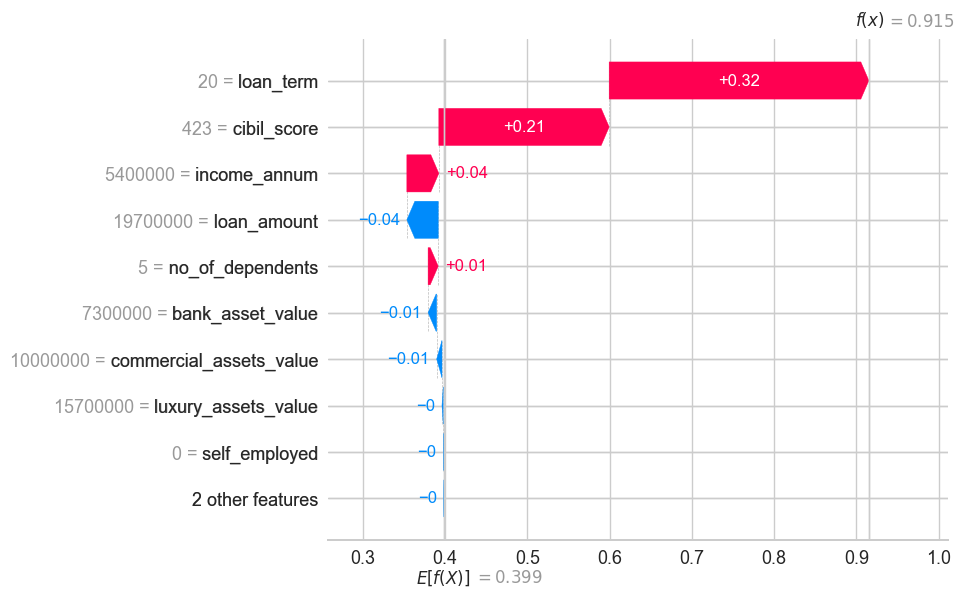

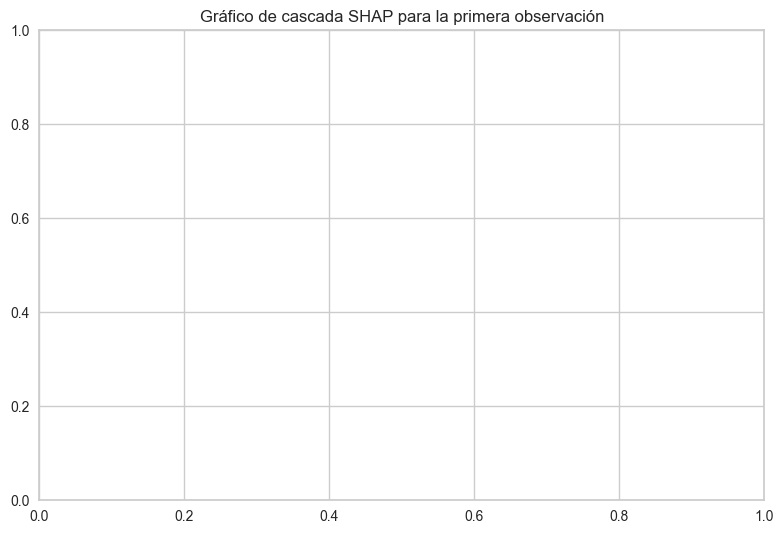

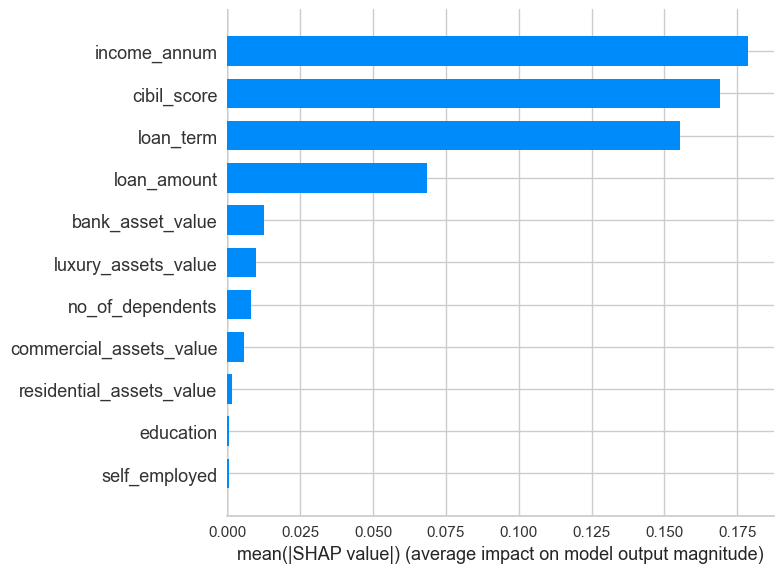

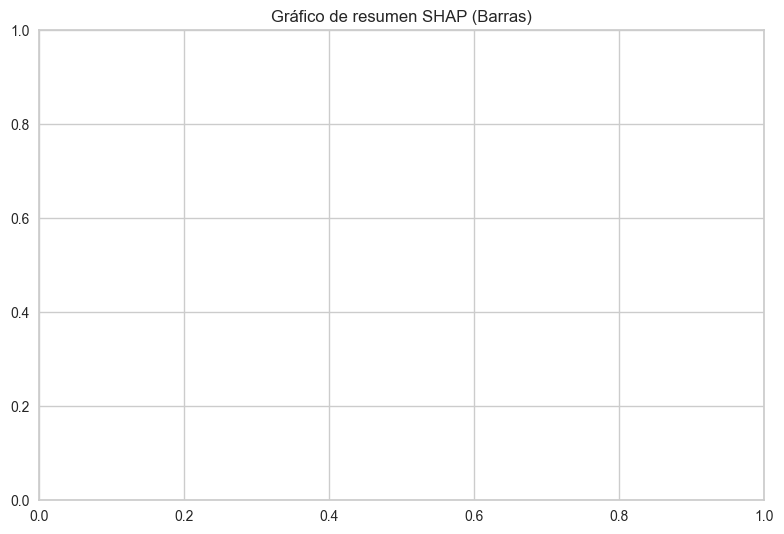

<Figure size 1200x600 with 0 Axes>

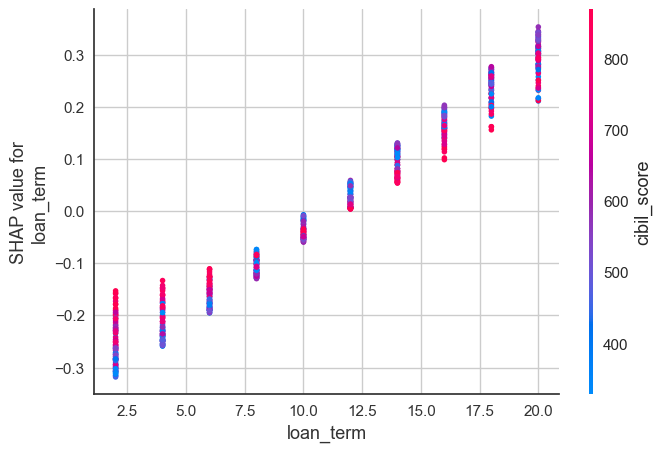

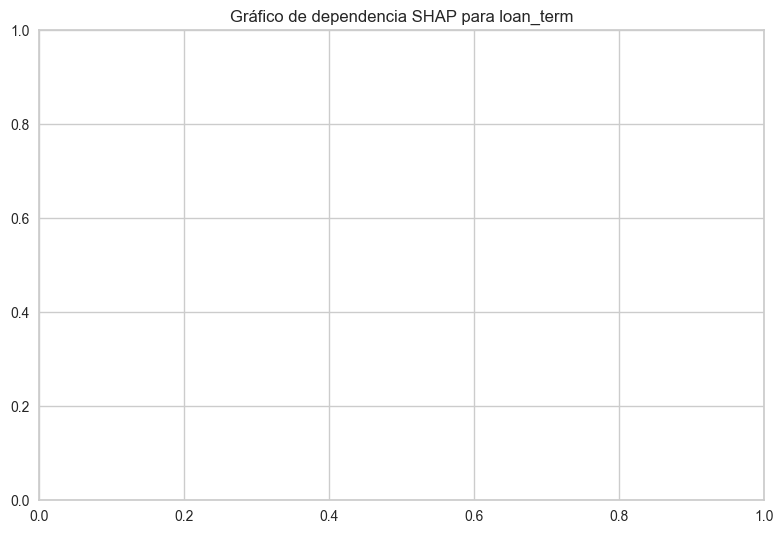

<Figure size 1200x600 with 0 Axes>

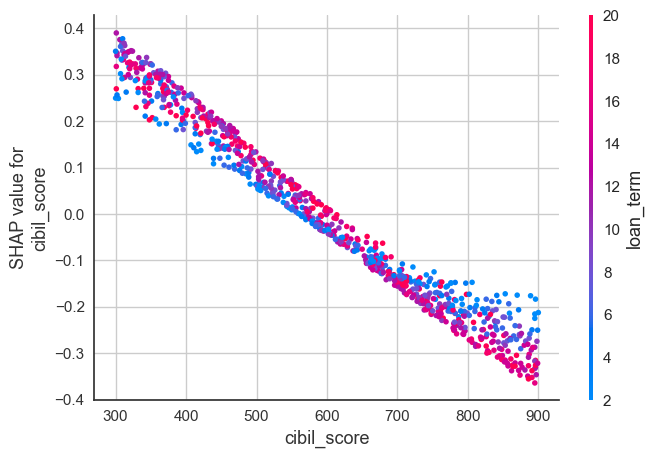

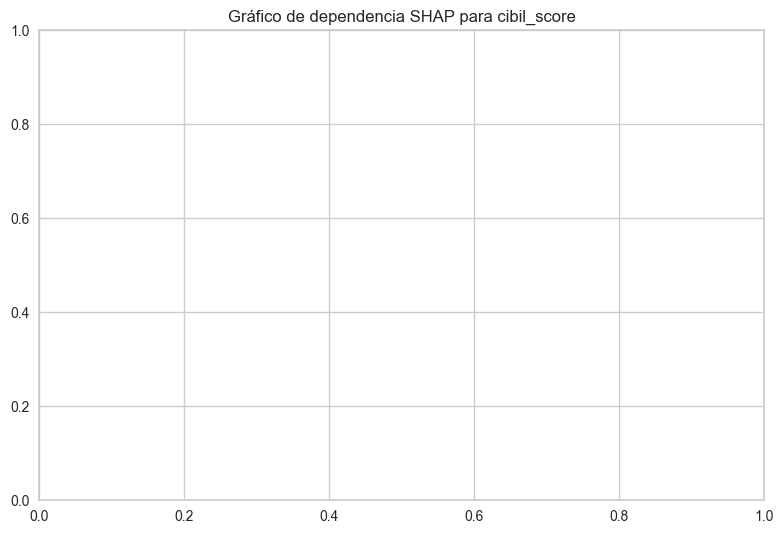

<Figure size 1200x600 with 0 Axes>

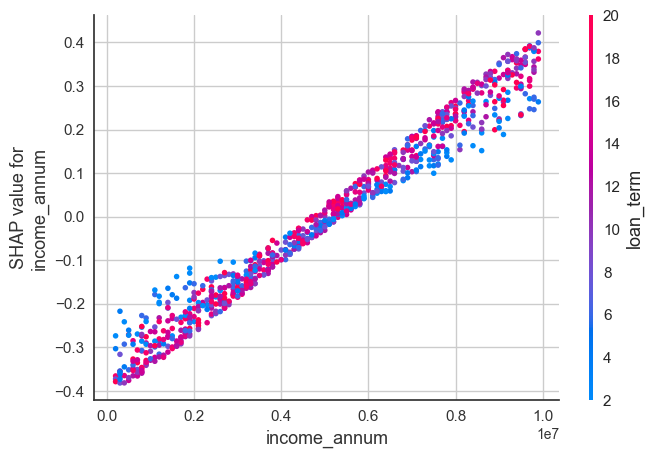

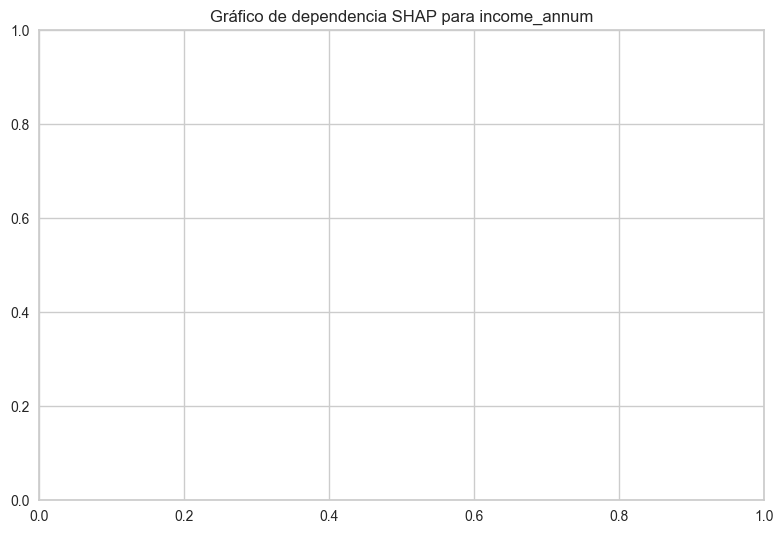

Análisis SHAP completado. Se han mostrado los gráficos.


Primeras filas de las predicciones:
      prediction_score
1703            0.9152
1173            0.7220
308             0.9484
1322            0.8376
3271            0.7582

Nota: La columna 'loan_status' no está presente en las predicciones.

Importancias de Características:
              característica  importancia
3               income_annum     0.178665
6                cibil_score     0.168905
5                  loan_term     0.155293
4                loan_amount     0.068497
10          bank_asset_value     0.012695
9        luxury_assets_value     0.009745
0           no_of_dependents     0.007990
8    commercial_assets_value     0.005588
7   residential_assets_value     0.001669
1                  education     0.000525
2              self_employed     0.000515

Primeras filas de las predicciones con 'loan_status' añadido:
      loan_status  prediction_score
1703            1            0.9152
1173            0            0.7220
308             1            0.9484
1322       

In [17]:
import pandas as pd
import numpy as np
from pycaret.classification import setup, create_model, finalize_model, predict_model, save_model
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
data = pd.read_csv('loan_approval_dataset.csv')

# Limpiar los nombres de las columnas eliminando espacios al inicio y al final
data.columns = data.columns.str.strip()

# Eliminar la columna loan_id ya que es solo un identificador
data_cleaned = data.drop(columns=['loan_id'])

# Función para codificar variables categóricas
def encode_categorical(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column].astype(str))
    return df

# Codificar variables categóricas
data_encoded = encode_categorical(data_cleaned.copy())

# Separar características y variable objetivo
X = data_encoded.drop(columns=['loan_status'])
y = data_encoded['loan_status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar la configuración de PyCaret para clasificación
clf_setup = setup(data_encoded, target='loan_status', fix_imbalance=True, session_id=42)

# Crear un modelo de regresión logística
logreg_model = create_model('lr')  # 'lr' significa Regresión Logística

# Finalizar el modelo para usarlo en predicciones
final_logreg_model = finalize_model(logreg_model)

# Guardar el modelo de regresión logística
save_model(final_logreg_model, 'final_logistic_regression_model')

# Crear una función que devuelva las probabilidades de la clase 1 (default) del modelo
def predict_proba_class1(X):
    return final_logreg_model.predict_proba(X)[:, 1]  # Solo nos interesan las probabilidades de la clase 1

# Crear el explicador SHAP usando PermutationExplainer
explainer = shap.PermutationExplainer(predict_proba_class1, X_train)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Calcular el valor esperado manualmente (expected value)
expected_value = np.mean(predict_proba_class1(X_train))

# Inicializar JavaScript para los gráficos interactivos
shap.initjs()

# Visualizar el force plot para la primera observación
plt.figure(figsize=(20, 3))
shap.force_plot(expected_value, shap_values[0].values, X_test.iloc[0,:], matplotlib=True, show=False)
plt.title("Force Plot para la primera observación")
plt.tight_layout()
plt.show()

# Visualizar el force plot para la décima observación
plt.figure(figsize=(20, 3))
shap.force_plot(expected_value, shap_values[10].values, X_test.iloc[10,:], matplotlib=True, show=False)
plt.title("Force Plot para la décima observación")
plt.tight_layout()
plt.show()

# Crear un gráfico summary (beeswarm plot) basado en las probabilidades
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test)
plt.title("Gráfico de resumen SHAP (Beeswarm)")
plt.tight_layout()
plt.show()

# Crear un gráfico waterfall plot para la primera observación
plt.figure(figsize=(12, 8))
shap.waterfall_plot(shap_values[0])
plt.title("Gráfico de cascada SHAP para la primera observación")
plt.tight_layout()
plt.show()

# Mostrar gráfico de resumen SHAP (gráfico de barras)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Gráfico de resumen SHAP (Barras)")
plt.tight_layout()
plt.show()

# Mostrar gráficos de dependencia SHAP para las 3 características principales
top_features = np.argsort(np.abs(shap_values.values).mean(0))[-3:]
for feature in top_features:
    plt.figure(figsize=(12, 6))
    shap.dependence_plot(feature, shap_values.values, X_test)
    plt.title(f"Gráfico de dependencia SHAP para {X_test.columns[feature]}")
    plt.tight_layout()
    plt.show()

print("Análisis SHAP completado. Se han mostrado los gráficos.")

# Hacer predicciones con probabilidades
predictions = predict_model(final_logreg_model, data=X_test)

# Identificar la columna de probabilidad
prob_column = [col for col in predictions.columns if col.startswith('prediction_score') or col.startswith('Score_')]

if prob_column:
    # Vista previa de predicciones con probabilidades
    print("Primeras filas de las predicciones:")
    if 'loan_status' in predictions.columns:
        print(predictions[['loan_status', prob_column[0]]].head())
    else:
        print(predictions[[prob_column[0]]].head())
        print("\nNota: La columna 'loan_status' no está presente en las predicciones.")
else:
    print("Columna de probabilidad no encontrada. Aquí están las columnas disponibles:")
    print(predictions.columns)

# Imprimir importancias de características
feature_importance = pd.DataFrame({'característica': X_test.columns, 'importancia': np.abs(shap_values.values).mean(0)})
feature_importance = feature_importance.sort_values('importancia', ascending=False)
print("\nImportancias de Características:")
print(feature_importance)

# Opcional: Si necesitas la columna 'loan_status' en las predicciones, puedes añadirla así:
predictions['loan_status'] = y_test.values
print("\nPrimeras filas de las predicciones con 'loan_status' añadido:")
print(predictions[['loan_status', prob_column[0]]].head())